# Learning Activations in Neural Networks

Import all the necassary libraries required for the task.

In [1]:
import numpy as np # Numpy to perform mathematical computation
import matplotlib.pyplot as plt # Plot the performance of the model
from sklearn.datasets import load_breast_cancer # Inbuilt dataset from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Preprocessing of the data using standardscaler
from sklearn.metrics import f1_score #To find the F1 score of the model
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout 
import tensorflow as tf

**Forward Propagation**


> * No. features form the number of neurons in the input layer.From the input layer to the hidden layer z1 the net input computed as the dot product of input and weight(w1) plus bias(b1), this net input is activated using AdaAct activationa and dropout is applied. Dropout is used because we observed the model being overfitting which leads to the implementation of neural network using dropout.

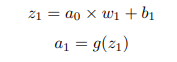





> The output from the first hidden layer is then passed to the second hidden layer and the net input is activated and dropout is applied

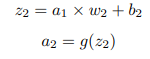



> The output from the second hidden layer is given to the output layer the following computation is performed and then softamx activation function is applied.

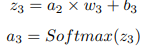



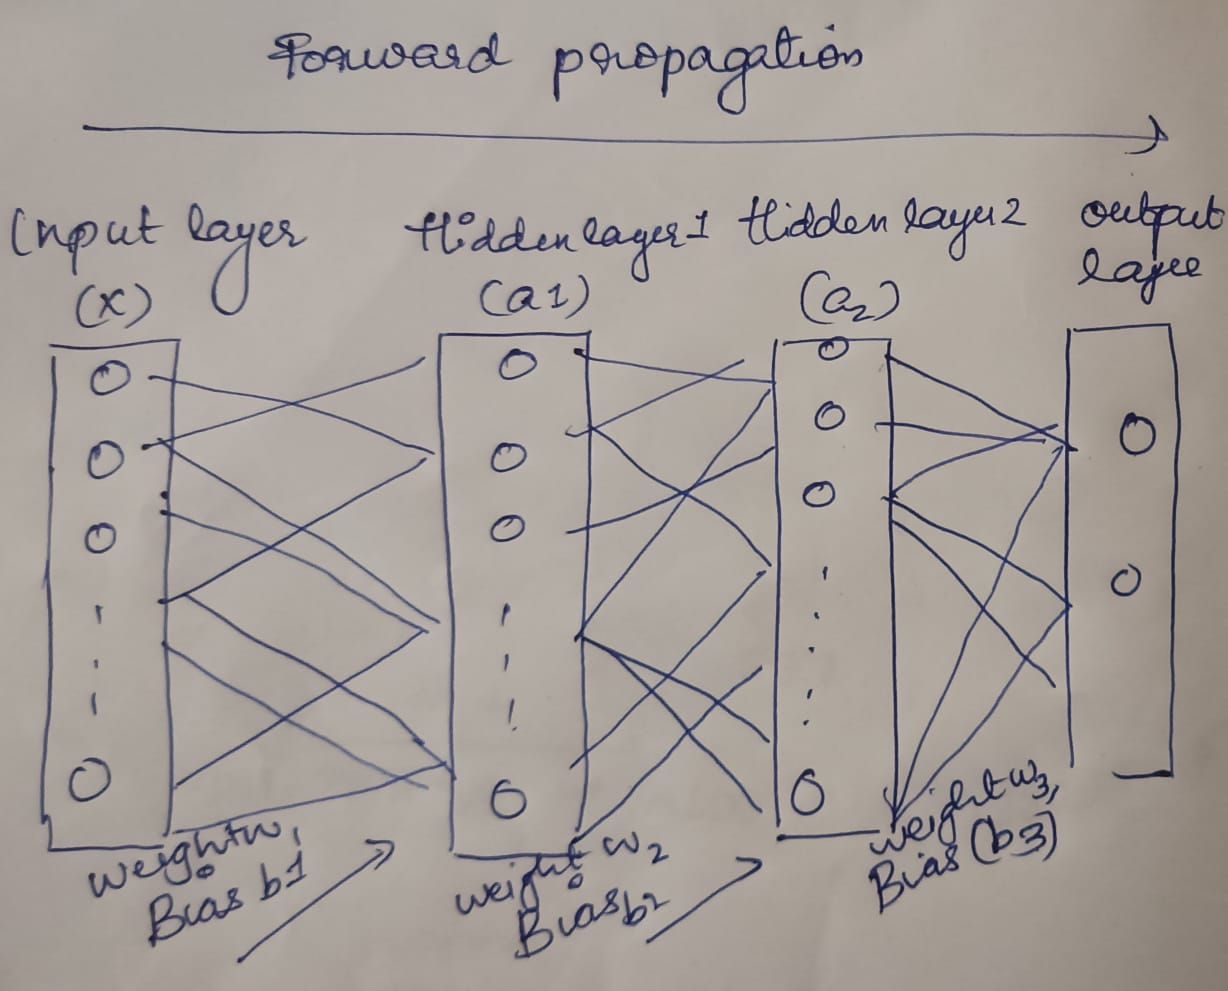







**Back Propagation**

Back Propagation in neural network reduces error and finds the optimal paramters for the neural network by updating the weights and bias till achieve minimum cost function.


> * The difference between the predicted output and the actual output is found
  * The derivative of loss function is computed 
  * The mean of the output is taken
  * The derivative of the loss with respect to the activations in hidden layer 2 is calculated.
  * Activation is performed
   
  This updation of weights,bias is done over a number of iteration till the loss function become minimum.
  
   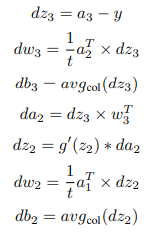



**Upadtion of parameters**

weights and bias

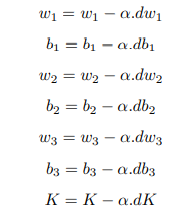

In [2]:
class Model:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size #Defines the no. of features for the input layer of the neural network
        self.hidden_size = hidden_size #The no.of neurons in the hidden layer
        self.output_size = output_size #The no of output neurons for the output layer in the neural network
        self.w1 = np.random.randn(input_size, hidden_size) #The weight matrix between the hidden layer and input layer,the weights are randomly intialised. 
        self.b1 = np.zeros(hidden_size) #Bias vector is intialised with zeros
        self.w2 = np.random.randn(hidden_size, hidden_size) #The weight matrix between the first adn second hidden layer,the weights are randomly intialised. 
        self.b2 = np.zeros(hidden_size) #Bias vector is intialised with zeros
        self.w3 = np.random.randn(hidden_size, output_size)#The weight matrix between the hidden and output layer,the weights are randomly intialised. 
        self.b3 = np.zeros(output_size) #Bias vector is intialised with zeros
        self.train_losses = [] #intialise an empty list to store train loss values during training of the model
        self.test_losses = []  #intialise a list to store test loss values during training of the model
    def forward_propagation(self, X, training=True): #training parameter will allow the dropout to happen.
            self.z1 = np.dot(X, self.w1) + self.b1 
            self.a1 = self.ada_act(self.z1)  
            self.a1 = self.dropout(self.a1, dropout_rate)  # Apply dropout with rate of 0.2

            self.z2 = np.dot(self.a1, self.w2) + self.b2
            self.a2 = self.ada_act(self.z2)  
            self.a2 = self.dropout(self.a2, dropout_rate)  # Apply dropout

            self.z3 = np.dot(self.a2, self.w3) + self.b3
            self.a3 = self.softmax(self.z3) #Apply Softmax activation function
            return self.a3      
    def backward_propagation(self, X, y):
            m = X.shape[0]
            y_one_hot = to_categorical(y, num_classes=self.output_size)

            self.dz3 = self.a3 - y_one_hot
            self.dw3 = (1 / m) * np.dot(self.a2.T, self.dz3)
            self.db3 = np.mean(self.dz3, axis=0)

            self.da2 = np.dot(self.dz3, self.w3.T)
            self.dz2 = self.da2 * self.ada_act_prime(self.z2) 
            self.dw2 = (1 / m) * np.dot(self.a1.T, self.dz2)
            self.db2 = np.mean(self.dz2, axis=0)

            self.da1 = np.dot(self.dz2, self.w2.T)
            self.dz1 = self.da1 * self.ada_act_prime(self.z1)  
            self.dw1 = (1 / m) * np.dot(X.T, self.dz1)
            self.db1 = np.mean(self.dz1, axis=0)
    def update_parameters(self, learning_rate):
            self.w1 -= learning_rate * self.dw1
            self.b1 -= learning_rate * self.db1
            self.w2 -= learning_rate * self.dw2
            self.b2 -= learning_rate * self.db2
            self.w3 -= learning_rate * self.dw3
            self.b3 -= learning_rate * self.db3        
    def ada_act(self, x):
            alpha = 1.0
            epsilon = 1e-8
            max_value = 2.0
            min_value = -2.0
            return np.maximum(np.minimum(alpha * x, max_value), min_value)

    def ada_act_prime(self, x):
        alpha = 1.0
        epsilon = 1e-8
        max_value = 2.0
        min_value = -2.0
        return np.where((x >= min_value) & (x <= max_value), alpha, 0)

    def softmax(self, x):
        exp_scores = np.exp(x)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    def dropout(self, x, dropout_rate):
        mask = np.random.rand(*x.shape) < dropout_rate
        return x * mask / dropout_rate    

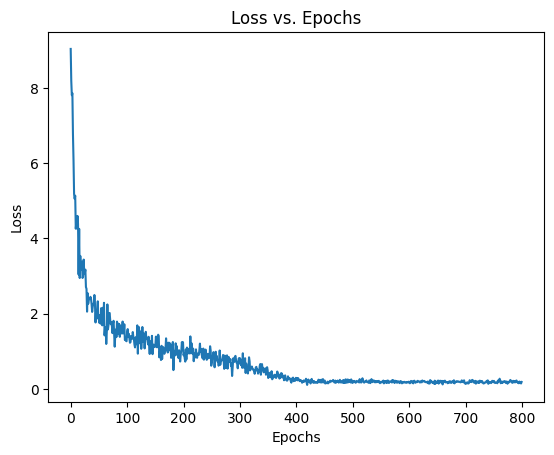

Training Accuracy: 0.9318681318681319
Testing Accuracy: 0.956140350877193
Training F1-Score: 0.9320643147659669
Testing F1-Score: 0.9562368871555263


In [3]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
import numpy as np
import tensorflow as tf


# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set the input, hidden, and output sizes
input_size = X_train.shape[1]
hidden_size = 250
output_size = len(np.unique(y_train))

# Create the model instance
model = Model(input_size, hidden_size, output_size)

# Set the hyperparameters
epochs = 800
learning_rate = 0.1
dropout_rate = 0.2 
# Lists to store the losses, accuracies, and F1-scores
losses = []
accuracies = []
f1_scores = []

# Training loop
for epoch in range(epochs):
    # Forward propagation
    y_pred = model.forward_propagation(X_train)

    # Compute loss
    loss = -np.mean(np.log(y_pred[np.arange(len(y_train)), y_train] + 1e-8))
    losses.append(loss)

    # Compute accuracy
    y_pred_labels = np.argmax(y_pred, axis=1)
    accuracy = np.mean(y_pred_labels == y_train)
    accuracies.append(accuracy)

    # Compute F1-Score
    f1 = f1_score(y_train, y_pred_labels, average='weighted')
    f1_scores.append(f1)

    # Backpropagation
    model.backward_propagation(X_train, y_train)

    # Update parameters
    model.update_parameters(learning_rate)

# Make predictions on the testing set
y_pred_test = model.forward_propagation(X_test)
y_pred_test_labels = np.argmax(y_pred_test, axis=1)

# Calculate evaluation metrics
test_accuracy = np.mean(y_pred_test_labels == y_test)
test_f1_score = f1_score(y_test, y_pred_test_labels, average='weighted')

# Plot the loss function vs. epochs
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs. Epochs")
plt.show()

# Print the results
print("Training Accuracy:", accuracies[-1])
print("Testing Accuracy:", test_accuracy)
print("Training F1-Score:", f1_scores[-1])
print("Testing F1-Score:", test_f1_score)

In [4]:
# Print the final parameter values
print("Final Parameter Values:")
print("W1:", model.w1)
print("B1:", model.b1)
print("W2:", model.w2)
print("B2:", model.b2)
print("W3:", model.w3)
print("B3:", model.b3)

Final Parameter Values:
W1: [[ 0.21716371 -0.20134177  0.77437318 ... -0.75113952  1.56518804
   0.51032914]
 [-1.28129571  0.73436965  2.24438406 ... -0.26874278 -0.91648986
  -1.3117964 ]
 [ 0.64485454  1.84578493 -1.270649   ... -0.85830288 -0.80826435
  -1.29708948]
 ...
 [ 0.46129308 -0.84395624 -0.09302855 ... -0.64689825 -0.12021592
   0.56761602]
 [ 0.45384577 -1.78745261  0.80139527 ... -0.0379052  -1.93417011
  -1.28570148]
 [ 0.07726708 -0.70250038  1.14788876 ...  2.05199229 -2.71313441
  -0.04692485]]
B1: [ 0.33244735  0.04657924  0.04045893  0.41006368 -0.01525787 -0.08775573
 -0.22343648  0.0230606  -0.02784164 -0.2580659  -0.23879822 -0.1786821
  0.00883546 -0.00384155  0.01220256  0.42162604 -0.0750668   0.02559918
 -0.0246541  -0.15809238 -0.28864501  0.11572147 -0.07094819 -0.36652565
  0.06694334 -0.09222201  0.00633753 -0.02346393 -0.06660412 -0.00778729
 -0.02655569  0.00570467 -0.05066134 -0.18072744 -0.02947563  0.06220562
  0.33958487  0.07689783  0.05363529 -0

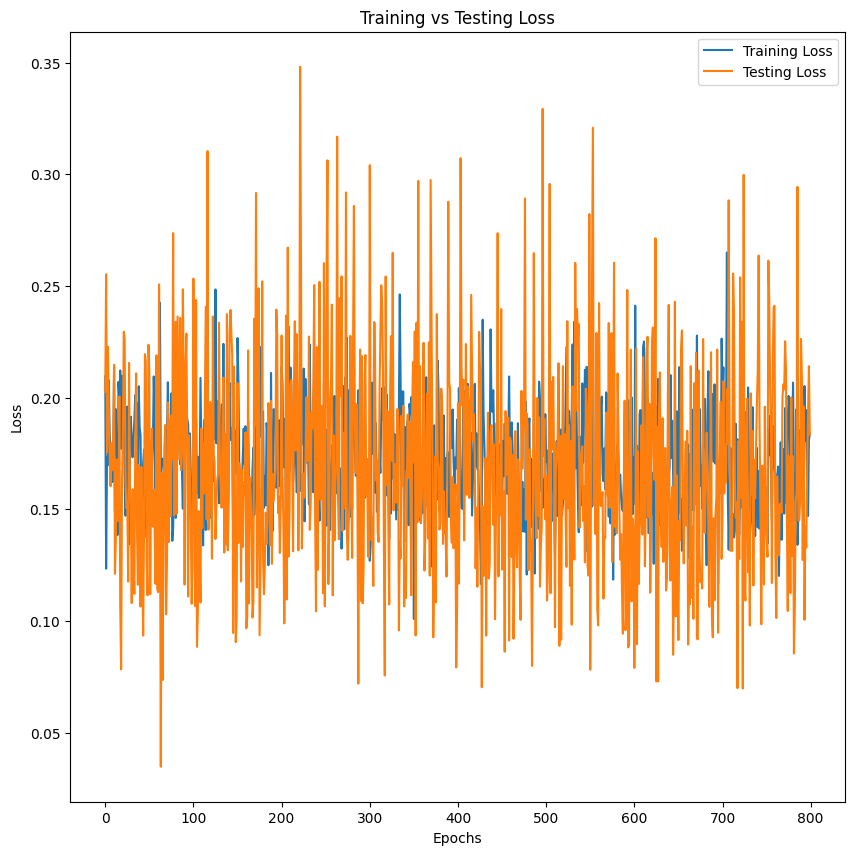

In [5]:
# Training loop
for epoch in range(epochs):
    # Forward propagation
    y_pred = model.forward_propagation(X_train)

    # Compute loss
    train_loss = -np.mean(np.log(y_pred[np.arange(len(y_train)), y_train] + 1e-8))
    model.train_losses.append(train_loss)

    # Backpropagation
    model.backward_propagation(X_train, y_train)

    # Update parameters
    model.update_parameters(learning_rate)

    # Perform forward propagation on the testing set
    y_pred_test = model.forward_propagation(X_test)

    # Compute testing loss
    test_loss = -np.mean(np.log(y_pred_test[np.arange(len(y_test)), y_test] + 1e-8))
    model.test_losses.append(test_loss)
# Plot the training and testing loss curves
plt.figure(figsize=(10,10))
plt.plot(model.train_losses, label='Training Loss')
plt.plot(model.test_losses, label='Testing Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Testing Loss")
plt.legend()
plt.show()
